# Numerisk analyse av kule på krumt underlag

**Utført av:** Martine Fjelldal, Oliver Sætre, Fredrik Stokke, Vebjørn Blom-Hagen og Jonas Meyer Jamt

**Dato og tid:** 09.10.2023 kl 10:15


## Sammendrag

Numeriske og eksperimentelle verdier for banefart og tidsutvikling ble bestemt for en kule med rullende bevegelse på en simulert bane. Banen ble automatisk generert og etterpå realisert på en tavle med åtte festepunkter. Sluttfarten til en kule gjennom den simulerte banen ble beregnet til å være 1,632 m/s. Forsøksvis ble sluttfarten 1,422 m/s. Disse resultatene viser et avvik på 12,81 %. Det gir et tap i mekanisk energi på 24,05%


## Introduksjon

I dette prosjektet studeres ei kule som ruller på et krumt underlag. Målet er å undersøke i hvor stor grad mekanisk energibevarelse i praksis avviker fra numeriske beregninger. Dette avviket bestemmes av forskjellen mellom beregningene og eksperimentell måling av sluttfarten til kulen. For å forenkle beregningene antas det at friksjonen er stor nok til at kulen ikke glir, men at den ikke blir påvirket av annen friksjon som luftmotstand. Hvis dette er tilfellet kan en regne ut banefart, helningsvinkel, tidsutvikling, normalkraft og friksjon ved hjelp av lover om translasjonsenergi, rotasjonsenergi og energibevaring.

## Teori

I disse forsøkene er det antatt at energien ikke tapes av friksjon, slik at noen av utregningene er forenklet. Med disse forenklingene kan man bruke ligningen for bevarelse av mekanisk energi, hvor energien som blir omgjort til varme og vibrasjoner ikke blir inkludert. Formelene nedenfor er basert på likninger fra heftet "Ren rulling på krumt underlag"[1],
Det tas kun hensyn til potensiell-, kinetisk energi og friksjon i de eksperimentelle verdiene. I de teoretiske utregningene er energi før lik energi etter altså null tap av energi i form av friksjon. 
Formelen under brukes til å utlede andre formler samt beskrive energien til kula i systemet:

$$
E_k + E_{p0} = E_{k1} + E_{p1} \quad (1)
$$

Hvor Ep og Ek er forholdsvis den potensielle energien i dette forsøket i form av mgh, og Ek er den kinetiske i form av translasjonsenergi og rotasjonsenergi ½*mv^2 og ½*c*mv^2. Hvor c er en konstant for massefordeling til kulen. Ved å bruke ligning 1 og deretter sette farten alene på venstre side kan ett uttrykk for farten til kula utledes, som en funksjon av den vertikale aksen y.

Ved å bruke ligning 1 og deretter sette farten alene på venstre side, kan et uttrykk for farten til kula utledes som en funksjon av den vertikale aksen y:

$$
v(y) = \sqrt{\frac{2g(y_0 - y)}{1+c}} \quad (2)
$$

Hvor \( g \) er tyngdeakselerasjonen og \( y_0 \) er start­høyden. Videre er det praktisk å ha vinkelen til banen for hver \( x \)-posisjon i forhold til den horisontale aksen. Dette krever at uttrykket for farten er gitt ved \( x \) i stedet for \( y \). Dette er ikke særlig krevende, kan endre dette ved å definere \( x \) som en funksjon av \( y \), altså \( y(x) \) i stedet for \( y \), for så å sette inn i likning 2. Dette gir ligning 3: 

$$
v(x) = \sqrt{\frac{2g(y_0 - y(x))}{1+c}} \quad (3)
$$

Ved å derivere \( y(x) \) med hensyn på \( x \), gir dette et uttrykk som ser slik ut:

$$
\frac{dy}{dx} = \tan(\beta) \quad \Rightarrow \quad \beta = \arctan\left(\frac{dy}{dx}\right) \quad (4)
$$

For å utlede normalkraften trengs sentripetalakselerasjonen, og den blir utledet fra krumningen til banen:

$$
K = \frac{\frac{d^2y}{dx^2}}{\left(1 + \left(\frac{dy}{dx}\right)^2\right)^{\frac{3}{2}}} \quad (5)
$$

Den dobbelderiverte og den deriverte er fra \( y(x) \)-likningen til banen. Sentripetalakselerasjonen er gitt fra følgende sammenheng:

$$
A_s = v^2 \cdot K = \frac{2g(y_0 - y(x))(d^2y/dx^2)}{(1+c)(1+(dy/dx)^2)^{\frac{3}{2}}} \quad (6)
$$

Normalkraften under en bevegelse der banen ikke er konstant horisontal er gitt ved Newtons 2. lov:

$$
\sum F = m \cdot A_s \quad (7)
$$

Ved å sette likning 7 inn i likning 8, og så løse sum av krefter ortogonalt i forhold til banen, gir følgende formel:

$$
Mg \cdot \cos(\beta) + N = m \cdot A_s \quad \Rightarrow \quad N = m \cdot (g \cdot \cos(\beta) + A_s) \quad (8)
$$

Kreftene som virker tangentielt til banen er en komponent av \( G \) og friksjonskraften. Da gir Newtons 2. lov et uttrykk med akselerasjon tangentielt til banen:
$$
m*g*sin(\beta) - f = m*a \quad (9)
$$
I dette forsøket ruller et objekt, da må rotasjonkreftene taes med. Newtons 2. lov for rotasjon gir:

$$
F*r = I*alpha => F = -c m dv/dt  \quad (10)
$$
Alpha er vinkelakselerasjonen. dv/dt er endring av fart på hensyn av tid [1]. Likning 9 og 10 gir likning 11:

$$
f = \frac{c M g \sin(\beta)}{1 + c} \quad (11)
$$

For å finne tidsutviklingen kan man bruke $(t=s/v)$, hvor \(s\) er $\Delta x_i$, v er $\Delta v_i$ og t er tidsintervallene mellom hvert punkt, $\Delta t_i$:

$$
\Delta t_i = \frac{\Delta x_i}{\Delta v_i} \quad (12)
$$

For å finne tiden til et gitt punkt, t_n, kan man med en gitt n, summere tidsintervallene,Delta t, fram til n for å finne tiden:

$$
t_n = \sum_{i}^{n} \Delta t_i \quad (13)
$$

Tap av mekanisk energi i det eksperimentelle forsøket kan utregnes med bruk av likning 1 og differansen av energien ved starten og slutten:

$$
mgh = \frac{1}{2} m v^2 + \frac{1}{2} I \omega^2 ==> Energitap = mgh-(\frac{1}{2} m v^2 + \frac{1}{2} c m v^2) \quad (14)
$$



##
Usikkerhetsanalyse:
##

Når det utføres eksperimentelle målinger på lab vil det alltid oppstå en usikkerhet. For å finne gjennomsnittsverdien t x gitt medil antall målinger, N kan man bruke:

$$
\overline{x} = \frac{1}{N} \sum_{n=1}^{N} x_i \quad (15)
$$

Standardavviket er uttrykket som brukes for hver måling, og er definert som:

$$
\sigma=\sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \overline{x})^2} \quad (16)
$$

Standardfeilen, som er usikkerheten til gjennomsnittet, er gitt ved:

$$
f = \frac{\sigma}{\sqrt{N}} \quad (17)
$$











## Metode

Baneformen, y(x), vist i figur B, ble i dette eksperimentet bestemt ut ifra et tildelt programeringsskriv som genererte åtte tilfeldige festepunkter ut fra noen kriterier. Banens starthøyde skulle være 300 mm som høyeste punkt i banen. Punktet skulle videre gå i en dal og bakketopp. Når kriteriene var oppfylt ble funksjonen CubicSpline fra Spicy-biblioteket, vist i Kode C, brukt for å interpolere tredjegradspolynomet.

Når festepunktene var satt, ble slutthastighet (𝑣𝑓), hastighet (𝑣), helning (𝛽) og krumning (𝜅) til kulen beregnet ved hjelp av likningene 2, 4 og 5. Tidsutviklingen til kulen ble beregnet ut ifra likning 12 for tidsintervall, og likning 13 for summen av intervallene. Simuleringen følger en teoretisk modell for bevaring av mekanisk energi. Den antar at kulen ruller rent og ikke slurer. I tillegg blir kulen antatt kompakt med uniform massefordeling. For å bergene forholdet mellom normalkraften og friksjonskraften i absoluttverdi ble Newtons 2. lov brukt, likning 8 og 11.

Kulebanen ble overført fra programmerte verdier til en lignende tavle vist ovenfor i figur T. Y-verdiene er høyden til tavlens festepunkter, vist som b i figur T, med en fast avstand på 20mm mellom hvert festepunkt. Det ble deretter satt opp et kamera som filmet i 30 bps, på et normalt stilt stativ med en fast avstand fra banen. For å få mist mulig feilkilder, ble kameraet satt vinkelrett med tavlen for å unngå feil perspektiv av videoen.

En én-meters linjal ble plassert foran kulebanen i en egen skinne tavlen hadde. Meterstaven ble brukt som hjelpemiddel til skalering i Tracker programmet. Videre ble en kule med en radius på 11 mm og masse 31 g sluppet fra startpunktet til banen, y0 = 300 mm. Kulen ble, med samme oppsett og verdier, filmet 10 ganger. Videoene ble overført til Trackerprogrammet hvor man da dannet et koordinatsystem, skalerte med bruk av meterstaven og la inn kulas verdier. I hver video ble «autotrack» brukt som et hjelpemiddel for å spore kulen gjennom banen. Kun i én av videoene ble kulen sporet gjennom hele hendingsforløpet for å finne baneform, tidsutvikling og banefarten. For de resterende ni andre så man kun etter sluttfarten og den totale tiden kulen brukte gjennom banen. 

For å finne gjennomsnittet ble likning 15 brukt, mens for standardavviket og standardfeilen ble likningene 16 og 17 brukt.
Til slutt ble eksperimentelle verdiene og de numeriske målte verdiene plottet mot hverandre og sammenlignet i Python.



![skisse av praktisk oppsett](https://1drv.ms/i/s!AnYrilAXkod9xy6ZbmMVo9c45U2W?e=ZNbfhw)

In [126]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd


In [127]:
xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)
c = 2/5

In [128]:
h = 200
xfast=np.asarray([0,1,2,3,4,5,6,7])*h

Vi lager deretter en array med høydekoordinatene til festepunktene.
De "tilfeldige" høydeendringene fra skrue til skrue sørger for at banens
starthøyde (300 mm) er banens høyeste punkt, og at den deretter går via
en dal og en bakketopp, og noen ganger en ny dal før siste skrue.

In [129]:
#Skruehøyder:
yfast = np.zeros(8)
yfast[0] = 300
yfast[1] = 253
yfast[2] = 175
yfast[3] = 150
yfast[4] = 199
yfast[5] = 210
yfast[6] = 141
yfast[7] = 110

Kode C: Programmet beregner i neste omgang 7 tredjegradspolynomer, et for hvert intervall mellom to nabofestepunkter (naboskruer), med scipy.interpolate-funksjonen CubicSpline:

In [130]:
cs = CubicSpline(xfast,yfast,bc_type='natural')

Funksjonen cs kan nå brukes til å regne ut $y(x)$, $y'(x)$ og $y''(x)$ for en vilkårlig horisontal posisjon x, eller som her, for alle de 1401 horisontale
posisjonene lagret i tabellen x. Funksjonen cs fungerer slik: <br>
cs(x)   tilsvarer $y(x)$ <br>
cs(x,1) tilsvarer $y'(x)$ <br>
cs(x,2) tilsvarer $y''(x)$ <br>

In [131]:
g = 9.81
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)

Figur B: Nå kan vi plotte baneformen $y(x)$

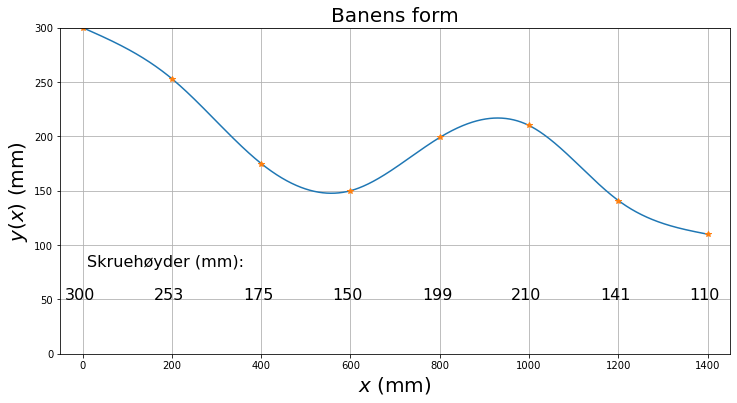

In [132]:
baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y,xfast,yfast,'*')
plt.title('Banens form', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$y(x)$ (mm)',fontsize=20)
plt.text(10,80,'Skruehøyder (mm):', fontsize=16)
plt.text(-40, 50, int(yfast[0]), fontsize=16)
plt.text(160, 50, int(yfast[1]), fontsize=16)
plt.text(360, 50, int(yfast[2]), fontsize=16)
plt.text(560, 50, int(yfast[3]), fontsize=16)
plt.text(760, 50, int(yfast[4]), fontsize=16)
plt.text(960, 50, int(yfast[5]), fontsize=16)
plt.text(1160, 50, int(yfast[6]), fontsize=16)
plt.text(1360, 50, int(yfast[7]), fontsize=16)
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()
plt.show()

Vi lager en (numpy-) array som inneholder x-koordinatene til festepunktene.
Horisontal avstand mellom festepunktene er 200 mm.

Vi setter startposisjon xmin, sluttposisjon xmax og steglengde dx = 1 mm
i x-retning. Deretter lager vi en array x med x-verdier fra 0 til 1400,
dvs for hver mm fra xmin til xmax. Funksjonen arange returnerer verdier på det halvåpne intervallet [xmin,xmax), dvs slik at xmin er med mens xmax ikke er med. Her blir dermed x[0]=xmin=0, x[1]=xmin+1*dx=1, ..., x[1400]=xmax-dx=1400, dvs x blir en tabell med 1401 elementer

In [133]:
y37 = y[400:1400]
y27 = y[200:1400]
y37min = np.min(y37)
y37max = np.max(y37)
y27min = np.min(y27)
y27max = np.max(y27)
K = d2y/(1+dy**2)**(1.5)
R = 1/(np.abs(K)+1E-8)  #unngaar R = uendelig
Rmin = np.min(R)
beta = np.arctan(dy)
betadeg = beta*180/np.pi
startvinkel = betadeg[0]
maksvinkel = np.max(np.abs(betadeg))

print('Høyeste punkt etter 3.skrue (mm): %4.0f' %y37max)
print('Laveste punkt etter 2.skrue (mm): %4.0f' %y27min)
print('Starthelningsvinkel (grader): %4.1f' %startvinkel)
print('Maksimal helningsvinkel (grader): %4.1f' %maksvinkel)
print('Minste krumningsradius (mm): %4.0f' %Rmin)
print('Festepunkthøyder (mm):', yfast)

Høyeste punkt etter 3.skrue (mm):  217
Laveste punkt etter 2.skrue (mm):  110
Starthelningsvinkel (grader): -10.3
Maksimal helningsvinkel (grader): 22.7
Minste krumningsradius (mm):  328
Festepunkthøyder (mm): [300. 253. 175. 150. 199. 210. 141. 110.]


## Resultater
Her vises først de teoretiske utregningene av fart, normalkraft, friksjonskraft og tidsutvikling. Lenger ned kommer sammenligninger opp mot forsøkene.

In [134]:
def v(y): 
  return (np.sqrt((2*g*1000*(300-y))/(7/5)))
print(v(y)[-1]/1000, "m/s")


1.631782548538342 m/s


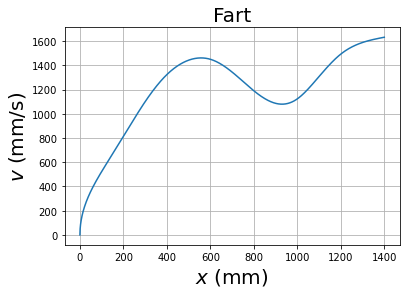

In [135]:
plt.plot(x,v(y))
plt.title('Fart', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$v$ (mm/s)',fontsize=20)


plt.grid()
plt.show()


In [136]:
#Massen til kula
m=0.031

#Sentripitalakselerasjon
def aSentr(y,dy,d2y):
  return 2*(300-y)/(7/5)*d2y/(1+dy**2)**3/2

#Normalkrafta vinkelrett på banenform
def N(beta):
  global y,dy,d2y
  return m*(g*np.cos(beta) + 2*(300-y)/(7/5)*d2y/(1+dy**2)**3/2)

#Akselerasjon tangentielt til banen
def a(beta):
  return -np.sin(beta)*5/7

#Den statiske friksjonkraften
def f(beta):
  return abs(2*m*g*np.sin(beta)/7)

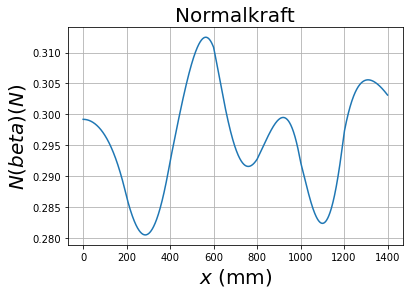

In [137]:
#Plott normalkraft
plt.plot(x,N(beta))
plt.title('Normalkraft', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$N(beta) (N)$',fontsize=20)

plt.grid()
plt.show()



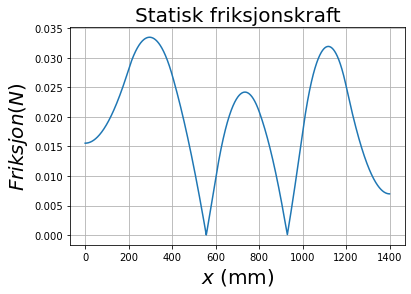

In [138]:

#Plott friksjonskraft
plt.plot(x, f(beta))
plt.title('Statisk friksjonskraft', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$Friksjon (N)$',fontsize=20)

plt.grid()
plt.show()

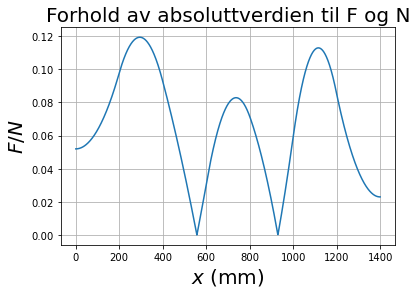

In [139]:
#Forhold mellom friksjon og normalkraft.

def forhold(beta):
    return abs(f(beta)/N(beta))

plt.plot(x, forhold(beta))
plt.title('Forhold av absoluttverdien til F og N', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$F/N$',fontsize=20)

plt.grid()
plt.show()


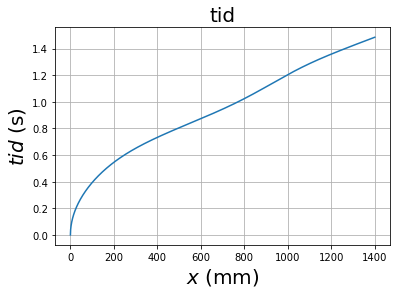

In [140]:

def tid(dx,y):
  t = np.zeros(1401)
  for i in range(1,1401):
    t[i] = (dx / ((v(y)[i]+v(y)[i-1])/2)) + t[i-1]
  return t
plt.plot(x, tid(dx, y))
plt.title('tid', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$tid$ (s)',fontsize=20)

plt.grid()
plt.show()

Sammenligning av teoretiske og målte verdier:

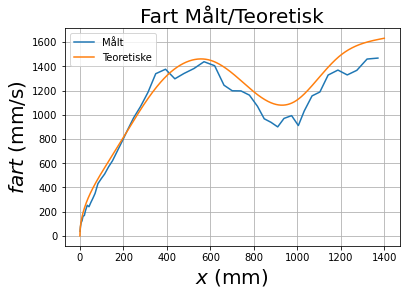

In [141]:
data = pd.read_csv('video1_data.txt', sep=',')
t_list = np.array(data['t'])
y_list = np.array(data['x'])*-1
x_list = (np.array(data['y'])-7.428E-2) *1000 # korrigerer for litt forskyvning i x-aksen og endrer fra meter til mm
v_list = np.array(data['v'])*1000

plt.plot(x_list, v_list, label='Målt')
plt.plot(x, v(y), label="Teoretiske")
plt.title("Fart Målt/Teoretisk", fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$fart$ (mm/s)',fontsize=20)
plt.grid()
plt.legend()
plt.show()

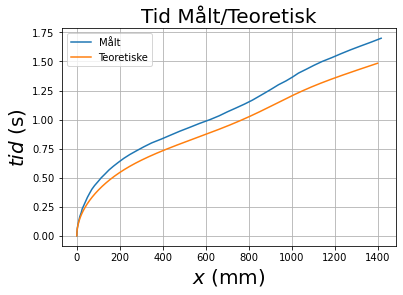

In [142]:
plt.plot(x_list, t_list, label='Målt')
plt.plot(x, tid(dx, y), label="Teoretiske")
plt.title('Tid Målt/Teoretisk', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$tid$ (s)',fontsize=20)
plt.legend()
plt.grid()
plt.show()

Middelverdier, standardfeil og avvik:

In [143]:
# funksjoner for å finne middelverdi, standardavvik og standardfeil
def middelverdi(kin):
    return np.mean(kin)

def standard_avik(kin):
    N = len(kin)-1
    sumkin = np.sum((kin-middelverdi(kin))**2)
    return np.sqrt(sumkin/N)

def standard_feil(kin):
    s_avik = standard_avik(kin)
    return s_avik/np.sqrt(len(kin))

In [144]:
slutt_tid = t_list[len(t_list)-1]
slutt_fart = v_list[len(v_list)-2]
slutt_tid_list = np.array([1.6, 1.667, 1.7, 1.633, slutt_tid, 1.567, 1.667,1.700, 1.6, 1.677])
slutt_fart_list = np.array([slutt_fart/1000, 1.408, 1.417, 1.408, 1.437, 1.417, 1.369, 1.489, 1.420, 1.383])

# middelverdi maalte sluttverdier
middelverdi_slutttid = middelverdi(slutt_tid_list)
middelverdi_sluttfart = middelverdi(slutt_fart_list)

# Standard_avik for målinger
standard_avik_slutt_tid = standard_avik(slutt_tid_list)
standard_avik_slutt_tid = standard_avik(slutt_fart_list)

# Standard feil tid fart
standard_feil_slutt_tid = standard_feil(slutt_tid_list)
standard_feil_slutt_fart = standard_feil(slutt_fart_list)

# display verdier 
print("Middelverdi \nslutt tid: ", middelverdi_slutttid,"s", end=" ")
print("slutt fart: ",middelverdi_sluttfart,"m/s")
print("Standardfeil \nslutt tid: ",standard_feil_slutt_tid,"s", end=" ")
print("slutt fart: ", standard_feil_slutt_fart,"m/s",)
print("standardavvik \nslutt tid: ", standard_avik_slutt_tid, "s", end=" ")
print("slutt fart: ", standard_feil_slutt_fart, "s")

Middelverdi 
slutt tid:  1.6511000000000002 s slutt fart:  1.4216000000000002 m/s
Standardfeil 
slutt tid:  0.015265392959967393 s slutt fart:  0.011355077180617406 m/s
standardavvik 
slutt tid:  0.03590790689775417 s slutt fart:  0.011355077180617406 s


Teoretisk og målt kinetisk energi ved slutt:

In [145]:
theory_kin = ((1+c)/2)*m*(v(y)[-1]/1000)**2
print("Teoretisk beregnet kinetisk energi: ", theory_kin)
def total_kinetisk_energi(c,m,v):
    kin_list = []
    for i in v:
        kin_list.append(((1+c)/2)*(m*i**2))
    kin_list = np.array(kin_list)
    return kin_list
tot_kin = total_kinetisk_energi(c,m,slutt_fart_list)
print("Total kinetisk energi for alle målingene:",tot_kin)
print("Middelverdien er:", middelverdi(tot_kin))
print("Standard_avviket er:",standard_avik(tot_kin))
print("Standardfeilen er:",standard_feil(tot_kin))

Teoretisk beregnet kinetisk energi:  0.0577809
Total kinetisk energi for alle målingene: [0.04676402 0.04301947 0.04357119 0.04301947 0.04480983 0.04357119
 0.04066929 0.04811153 0.04375588 0.04150535]
Middelverdien er: 0.043879721899999995
Standard_avviket er: 0.002229168117019642
Standardfeilen er: 0.0007049248537210824


In [146]:
potE = m*g*(0.3-0.11)
print("Total mekanisk energi før bevegelsen: ", potE)
def tap_av_mekanisk_energi(pk,pote):
    tap_list = []
    for i in pk:
        tap_list.append(pote-i)
    tap_list = np.array(tap_list)
    return tap_list
tap_mek = tap_av_mekanisk_energi(total_kinetisk_energi(c,m,slutt_fart_list), potE)
print("Totalt tap av mekanisk energi for alle målingene:",tot_kin)
print("Middelverdien er:", middelverdi(tap_mek))
print("Standard_avviket er:",standard_avik(tap_mek))
print("Standard feilen er:",standard_feil(tap_mek))

Total mekanisk energi før bevegelsen:  0.057780899999999996
Totalt tap av mekanisk energi for alle målingene: [0.04676402 0.04301947 0.04357119 0.04301947 0.04480983 0.04357119
 0.04066929 0.04811153 0.04375588 0.04150535]
Middelverdien er: 0.013901178099999998
Standard_avviket er: 0.002229168117019642
Standard feilen er: 0.0007049248537210824


## Diskusjon
Den målte farten er jevnt lavere enn den teoretiske farten, dette kan det være flere årsaker til. Farten som ble målt er funnet med bruk av tracker, disse verdiene kan være unøyaktige av flere grunner. Om telefonen som filmet ikke er montert i helt i vater, kan dette gi perspektivfeil, som fører til unøyaktige målinger. Det samme gjelder både meteren og x-y grafen som ble lagt inn i tracker for hånd. Det er rimelig å anta at disse ikke var helt eksakte, spesielt når det er snakk om ti målinger. En annen feilkilde kan være selve baneoppsettet. Den ble montert med linjal som kan gi målefeil, og det er rimelig å anta at selve banen ikke ender opp slik som baneplottet. Dette gir ulike verdier.

I tillegg er ikke luftmotstand tatt hensyn til, dette kan gi noe lavere fart på kulen. Luftmotstanden øker proporsjonalt med hastigheten kvadrert. Der farten er størst vil den bli mest påvirket av dette. Ut ifra fartsgrafen er forskjellen mellom den teoretisk største og eksperimentelle største verdien for farten for stor til å vurdere om luftmotstanden påvirker resultatet i stor nok grad. Dette er gjeldende på grunn av at andre feilkilder kan forkludre resultatet slik at luftmonstand ikke kan bli målt. 

Når vi antar at vi kan bruke energibevarelse, er det en forutsetning at kulen ruller med hvilefriksjon, og ikke glir mot underlaget. Da er det nødvendig at friksjonskoeffisienten, $\mu_s$, ikke overstiger 0,4. Fra plottet ser vi at forholdet mellom friksjonskraften og normalkraften ikke overstiger 0,12. Dermed er ikke friksjonskrafen for stor, og antagelsen korrekt.

Generelt sett gir de eksperimentelle målinge små standardavvik. Det tyder på at målinge er noenlunde forutsigbare. Likevel, opp imot de teoretiske verdiene er det problematiske avvik.
Avvikene mellom de teoretiske og eksperrimentelle verdiene er store. Et tap av mekanisk energi på 24% i forhold til den teoretiske kinetiske energien er en stor forskjell. Dette stemmer ikke overens med antagelsen av at friskjon er neglisjerbar. For det ville ha gitt mindre forskjell i avvik, at friksjonen er mye større enn antatt er lite sannsynlig. Denne forskjellen kan derimot skyldes feilkildene istedenfor friksjon. Resultane kan gi en antydning til at målemetodene ikke er særlig nøyaktige. Spesielt er målemetodene brukt i tracker problematiske. Slik at antagelsen om at feilkildene som gir de relativt dårlige resultatene er rimelige.

## Konklusjon
En ball som ruller på en rullebane krever flere utregninger for å beskrive dens fart, totaltid og energi. Det fysiske forsøket ble satt opp eksperimentelt ut ifra en simulert bane. Målinger fra den eksperimentelle samt målinger fra den simulerte er blitt sammenlignet. Forskjellen fra de teoretiske og eksperimentelle verdiene gir avviket. Avviket på slutttid og sluttfart var forholdsvis   og 12,81%. Dette gir et tap på mekanisk energi på 24%.  Hvor sluttfarten var mindre og sluttiden lengre for det fysiske eksperimentet i forhold til den simulerte. Dette er store avvikende verdier. For store til og skyldes friksjon og luftmotstand alene. Avviket kan komme fra perspektiv/målefeil i tracker og feil baneform. I tillegg kan friksjon og luftmotstand komme med et lite bidrag, men med en forskjell på sluttfart på 0.21 m/s, er det sannsynlig at de nevnte feilkilder påvirker resultatene i stor grad.


## Referanser

1. J. A Støvneng. Institutt for fysikk, NTNU: Ren rulling på krumt underlag – energibevarelse hentet den 16. Oktober 2023 fra https://home.phys.ntnu.no/brukdef/undervisning/fyslab/files/labligninger_V23.pdf